## Exercises: Seed Classification

We’ll now apply what we've learned to a new dataset: the **Seeds dataset** from the UCI Machine Learning Repository. This dataset contains measurements of various wheat seeds and their corresponding types.

We'll focus on classifying two of the three seed types (classes 1 and 3).

---

### 1. Load and Preprocess the Data

Load the dataset and keep only the two desired classes. This starting step is already provided for you. Make sure that you understand how the dataframe is filtered.

Then, split your dataset into a train (80%) and test (20%) split. 

💡 Tip: Use `train_test_split` from `sklearn.model_selection`. You can split an entire dataframe without selecting specific columns first.

---

### 2. Logistic Regression

Use logistic regression to classify the seeds based on:
- First only `length_groove`
- Then both `length_groove` and `perimeter`

For each case:
- Fit the model on the train set and make predictions on the test set
- Evaluate the model using a classification report

Which model performs better?

💡 Tip: Use `classification_report` from `sklearn.metrics`.

---

### 3. K-Nearest Neighbors

Train a KNN classifier on the same features. Compare the performance to logistic regression in terms of f1-score. Try different values for k (e.g., 3, 5, 7) and observe how the results change.

---

Feel free to experiment and visualize your results!

In [ ]:
import pandas as pd

# Step 1
seeds = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
    sep="\t",
    on_bad_lines="skip",
    names=["area", "perimeter", "compactness", "length", "width", "symmetry_coef", "length_groove", "seed_type"],
)

# Keep only seed types 1 and 3
seeds = seeds[(seeds.seed_type == 1) | (seeds.seed_type == 3)]
seeds.head()

,area,perimeter,compactness,length,width,symmetry_coef,length_groove,seed_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [13]:
# Split the dataset into train and test splits

from sklearn.model_selection import train_test_split

seeds_train, seeds_test = train_test_split(seeds, test_size=0.2, random_state=2025)

print(f"Number of samples in train set: {seeds_train.shape[0]}")
print(f"Number of samples in test set: {seeds_test.shape[0]}")


Number of samples in train set: 104
Number of samples in test set: 27


In [14]:
# Classify the seeds based on the feature length_groove

from sklearn.linear_model import LogisticRegression

log_model_single_feature = LogisticRegression()
log_model_single_feature.fit(seeds_train[["length_groove"]], seeds_train["seed_type"])

y_pred = log_model_single_feature.predict(seeds_test[["length_groove"]])

In [15]:
# Evaluate the predictions using a classification report
from sklearn.metrics import classification_report

print(classification_report(seeds_test.seed_type, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.17      0.26        18
           3       0.32      0.78      0.45         9

    accuracy                           0.37        27
   macro avg       0.46      0.47      0.36        27
weighted avg       0.51      0.37      0.32        27



In [16]:
# Classify the seeds based on the feature length_groove AND perimeter

log_model_two_features = LogisticRegression()
log_model_two_features.fit(seeds_train[["length_groove", "perimeter"]], seeds_train["seed_type"])

y_pred = log_model_two_features.predict(seeds_test[["length_groove", "perimeter"]])

In [17]:
# Evaluate the predictions using a classification report

print(classification_report(seeds_test.seed_type, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           3       0.82      1.00      0.90         9

    accuracy                           0.93        27
   macro avg       0.91      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



We can see that the second model has much better scores across all metrics, which means that the two features were needed to reliably predict the seed type.

Text(0.5, 1.0, 'Evaluation of the KNeighborsClassifier for different k values')

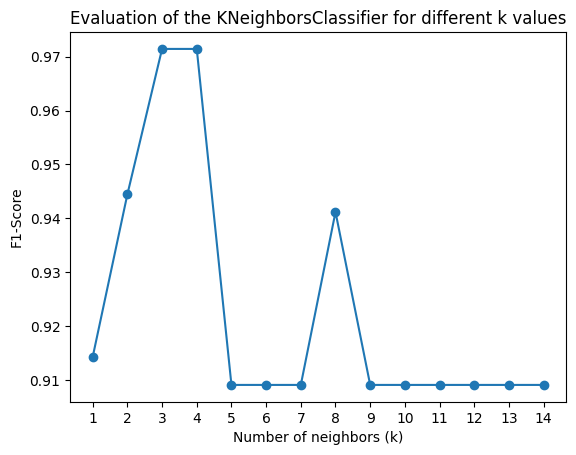

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


# Define different k-values that we want to try out with kNN
k_values = range(1, 15)

# For each k-value, train a kNN classifier and measure the f1 score on the test set
f1_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(seeds_train[["length_groove", "perimeter"]], seeds_train["seed_type"])

    y_pred = knn.predict(seeds_test[["length_groove", "perimeter"]])
    f1 = f1_score(y_true=seeds_test.seed_type, y_pred=y_pred)
    f1_scores.append(f1)

# Plot the f1 score for each k value
fig, ax = plt.subplots()
ax.plot(k_values, f1_scores, "o-")
ax.set_xticks(k_values)
ax.set_xlabel("Number of neighbors (k)")
ax.set_ylabel("F1-Score")
ax.set_title("Evaluation of the KNeighborsClassifier for different k values")